#1.Regression Example (Using For Loop VS Vectorization)

In [ ]:
import numpy as np
import time


# Features (x) and weights (w)
x = np.array([9, 5, 30, 1])
w = np.array([15, 10, -5, 8])
b = 5


# For loop method
def predict_loop(x, w, b):
    y = b
    for i in range(len(x)):
        y += w[i] * x[i]
    return y


# Vectorized method
def predict_vector(x, w, b):
    return np.dot(w, x) + b


# Measure execution time
start = time.time()
loop_result = predict_loop(x, w, b)
loop_time = time.time() - start


start = time.time()
vector_result = predict_vector(x, w, b)
vector_time = time.time() - start


# Print results
print(f"For Loop Delay: {loop_result} minutes")
print(f"Vectorized Delay: {vector_result} minutes")
print(f"For Loop Time: {loop_time:.6f} sec")
print(f"Vectorized Time: {vector_time:.6f} sec")


For Loop Delay: 48 minutes
Vectorized Delay: 48 minutes
For Loop Time: 0.000067 sec
Vectorized Time: 0.000096 sec


In [ ]:
import numpy as np
import time




# 2D Feature Matrix (5 samples, 4 features)
X = np.array([
    [9, 5, 30, 1],  # Flight 1
    [3, 7, 20, 0],  # Flight 2
    [8, 2, 25, 1],  # Flight 3
    [6, 6, 28, 0],  # Flight 4
    [5, 4, 35, 1]   # Flight 5
])




# Weights (same for all samples)
W = np.array([15, 10, -5, 8])  # Each feature’s impact on delay
b = 5  # Bias term




# Method 1: Using For Loop
def predict_loop(X, W, b):
    y = []
    for i in range(len(X)):  # Loop over each sample (row)
        y_i = b
        for j in range(len(W)):  # Loop over each feature (column)
            y_i += X[i][j] * W[j]
        y.append(y_i)
    return np.array(y)




# Method 2: Using Vectorized NumPy (Matrix Multiplication)
def predict_vectorized(X, W, b):
    return np.dot(X, W) + b  # Matrix multiplication (dot product) + bias




# Measure execution time
start = time.time()
delay_loop = predict_loop(X, W, b)
loop_time = time.time() - start




start = time.time()
delay_vector = predict_vectorized(X, W, b)
vector_time = time.time() - start




# Print results
print(f"For Loop Delays: {delay_loop}")
print(f"Vectorized Delays: {delay_vector}")
print(f"For Loop Time: {loop_time:.6f} sec")
print(f"Vectorized Time: {vector_time:.6f} sec")




For Loop Delays: [ 48  20  28  15 -47]
Vectorized Delays: [ 48  20  28  15 -47]
For Loop Time: 0.000196 sec
Vectorized Time: 0.001194 sec


#2.Logistic Regression

##Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Importing the dataset

In [2]:
dataset = pd.read_csv('Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [3]:
print(X)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 nan]
 ['France' 35.0 58000.0]
 ['Spain' nan 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


In [4]:
print(y)

['No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes']


## Taking care of missing data

In [5]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, 1:3])
X[:, 1:3] = imputer.transform(X[:, 1:3])

In [6]:
print(X)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 63777.77777777778]
 ['France' 35.0 58000.0]
 ['Spain' 38.77777777777778 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


## Encoding categorical data

### Encoding the Independent Variable

In [7]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = np.array(ct.fit_transform(X))


In [8]:
print(X)

[[1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [0.0 1.0 0.0 30.0 54000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 35.0 58000.0]
 [0.0 0.0 1.0 38.77777777777778 52000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


### Encoding the Dependent Variable

In [9]:
le = LabelEncoder()
y = le.fit_transform(y)

In [10]:
print(y)

[0 1 0 0 1 1 0 1 0 1]


## Splitting the dataset into the Training set and Test set

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [12]:
print(X_train)

[[0.0 0.0 1.0 38.77777777777778 52000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 35.0 58000.0]]


In [13]:
print(X_test)

[[0.0 1.0 0.0 30.0 54000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


In [14]:
print(y_train)

[0 1 0 0 1 1 0 1]


In [15]:
print(y_test)

[0 1]


## Feature Scaling

In [16]:
sc = StandardScaler()
X_train[:, 3:] = sc.fit_transform(X_train[:, 3:])
X_test[:, 3:] = sc.transform(X_test[:, 3:])

In [17]:
print(X_train)

[[0.0 0.0 1.0 -0.19159184384578545 -1.0781259408412425]
 [0.0 1.0 0.0 -0.014117293757057777 -0.07013167641635372]
 [1.0 0.0 0.0 0.566708506533324 0.633562432710455]
 [0.0 0.0 1.0 -0.30453019390224867 -0.30786617274297867]
 [0.0 0.0 1.0 -1.9018011447007988 -1.420463615551582]
 [1.0 0.0 0.0 1.1475343068237058 1.232653363453549]
 [0.0 1.0 0.0 1.4379472069688968 1.5749910381638885]
 [1.0 0.0 0.0 -0.7401495441200351 -0.5646194287757332]]


In [18]:
print(X_test)

[[0.0 1.0 0.0 -1.4661817944830124 -0.9069571034860727]
 [1.0 0.0 0.0 -0.44973664397484414 0.2056403393225306]]


## Training the Logistic Regression model on the Training set

In [19]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

## Predicting the Test set results

In [20]:
y_pred = classifier.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 0]
 [1 1]]


##Metrics

In [21]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"\nAccuracy: {accuracy:.2f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)


Accuracy: 0.50

Confusion Matrix:
 [[0 1]
 [0 1]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


##Visualising the Logistic Regression results

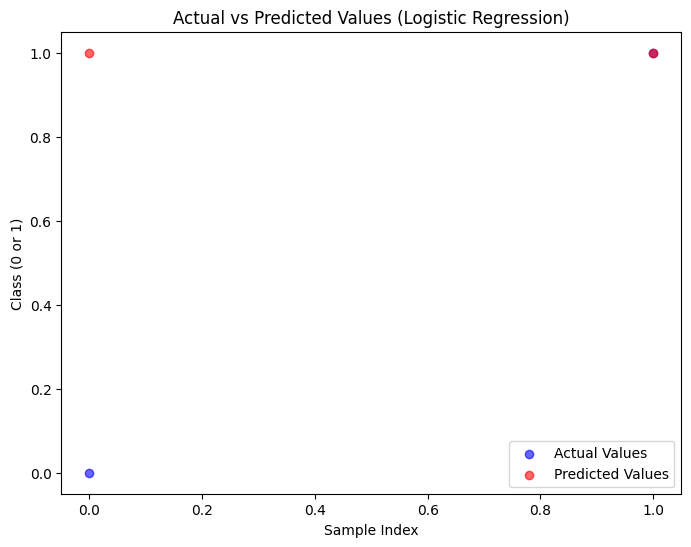

In [22]:
# Plotting Actual vs Predicted Values
plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Values', alpha=0.6)
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted Values', alpha=0.6)
plt.xlabel("Sample Index")
plt.ylabel("Class (0 or 1)")
plt.title("Actual vs Predicted Values (Logistic Regression)")
plt.legend()
plt.show()

#3. Vectorization


In [ ]:
import numpy as np

###Creating a 1D Array


In [ ]:
vector = np.array([1, 2, 3, 4, 5])
print(vector)
print("Shape:", vector.shape)  # Output: (5,)
print("Dimension:", vector.ndim)  # Output: 1


[1 2 3 4 5]
Shape: (5,)
Dimension: 1


###Representing 2D Matrices (2×3 and 4×5 examples)

In [ ]:
matrix_2x3 = np.array([
    [1, 2, 3],
    [4, 5, 6]
])


print(matrix_2x3)
print("Shape:", matrix_2x3.shape)  # Output: (2, 3)
print("Dimension:", matrix_2x3.ndim)  # Output: 2


[[1 2 3]
 [4 5 6]]
Shape: (2, 3)
Dimension: 2


In [ ]:
matrix_4x5 = np.array([
    [1, 2, 3, 4, 5],
    [6, 7, 8, 9, 10],
    [11, 12, 13, 14, 15],
    [16, 17, 18, 19, 20]
])


print(matrix_4x5)
print("Shape:", matrix_4x5.shape)  # Output: (4, 5)
print("Dimension:", matrix_4x5.ndim)  # Output: 2


[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]]
Shape: (4, 5)
Dimension: 2


###Higher Dimensional Arrays (3D Example)


In [ ]:
tensor_3d = np.array([
    [[1, 2, 3], [4, 5, 6]],  # First 2x3 matrix
    [[7, 8, 9], [10, 11, 12]]  # Second 2x3 matrix
])


print(tensor_3d)
print("Shape:", tensor_3d.shape)  # Output: (2, 2, 3)
print("Dimension:", tensor_3d.ndim)  # Output: 3


[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]
Shape: (2, 2, 3)
Dimension: 3


###Broadcasting in NumPy


In [ ]:
matrix = np.array([[1, 2, 3], [4, 5, 6]])
scalar = 10


result = matrix + scalar  # Broadcasting scalar to matrix
print(result)


[[11 12 13]
 [14 15 16]]


###Broadcasting a 1D Array to a 2D Matrix


In [ ]:
matrix = np.array([
    [1, 2, 3],
    [4, 5, 6]
])


vector = np.array([10, 20, 30])  # 1D array


result = matrix + vector  # Broadcasting 1D to 2D
print(result)


[[11 22 33]
 [14 25 36]]


###Example of Broadcasting Error


In [ ]:
matrix = np.array([[1, 2, 3], [4, 5, 6]])
wrong_vector = np.array([10, 20])  # Only 2 elements, should be 3!


result = matrix + wrong_vector  # Error!


ValueError: operands could not be broadcast together with shapes (2,3) (2,) 

#4.Building a Perceptron

In [1]:
import numpy as np

# Step 1: Define Activation Function (Step Function)
def step_function(x):
    return 1 if x >= 0 else 0  # Outputs 1 if weighted sum >= 0, else 0

# Step 2: Train Perceptron Model
def train_perceptron(X, Y, learning_rate=0.1, epochs=10):
    num_features = X.shape[1]  # Number of input features (2 for AND gate)
    weights = np.zeros(num_features)  # Initialize weights to zero
    bias = 0  # Initialize bias to zero

    # Training Loop
    for epoch in range(epochs):
        for i in range(len(X)):
            weighted_sum = np.dot(weights, X[i]) + bias  # Compute weighted sum
            prediction = step_function(weighted_sum)  # Apply activation function

            # Compute error
            error = Y[i] - prediction  # Difference between actual and predicted

            # Update weights and bias using perceptron learning rule
            weights += learning_rate * error * X[i]
            bias += learning_rate * error

    return weights, bias

# Step 3: Define Testing Function
def predict(X, weights, bias):
    predictions = []
    for i in range(len(X)):
        weighted_sum = np.dot(weights, X[i]) + bias  # Compute weighted sum
        output = step_function(weighted_sum)  # Apply activation function
        predictions.append(output)
    return predictions

# Step 4: Define Training Data (AND Gate Inputs and Outputs)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Inputs
Y = np.array([0, 0, 0, 1])  # AND Function Outputs

# Step 5: Train the Perceptron
weights, bias = train_perceptron(X, Y, learning_rate=0.1, epochs=10)

# Step 6: Test the Trained Perceptron
predictions = predict(X, weights, bias)

# Step 7: Print Results
print(f"Trained Weights: {weights}")
print(f"Trained Bias: {bias}")
for i in range(len(X)):
    print(f"Input: {X[i]}, Output: {predictions[i]}")

Trained Weights: [0.2 0.1]
Trained Bias: -0.20000000000000004
Input: [0 0], Output: 0
Input: [0 1], Output: 0
Input: [1 0], Output: 0
Input: [1 1], Output: 1


#5. Forward Propagation

In [2]:
import numpy as np

# Sigmoid activation function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Dense layer function
def dense(a_in, W, b):

    z = np.dot(W, a_in) + b  # Compute weighted sum + bias
    a_out = sigmoid(z)  # Apply activation function (Sigmoid)
    return a_out

# Define weight matrices and bias vectors
W1 = np.array([[1, 2],    # 3 neurons in hidden layer 1 (3x2 matrix)
               [-3, 4],
               [5, 6]])

b1 = np.array([-1, 1, 2])  # Bias for hidden layer 1

W2 = np.array([[0.5, -1, 2],   # 2 neurons in hidden layer 2 (2x3 matrix)
               [1, 3, -2]])

b2 = np.array([0, -1])  # Bias for hidden layer 2

W3 = np.array([[2, -1]])  # Output layer (1x2 matrix)

b3 = np.array([0.5])  # Bias for output layer

# Input feature vector (2D)
x = np.array([-2, 4])

# Forward propagation
a1 = dense(x, W1, b1)  # First hidden layer (3 neurons)
a2 = dense(a1, W2, b2) # Second hidden layer (2 neurons)
output = dense(a2, W3, b3)  # Output layer (1 neuron)

print("Final Output:", output)


Final Output: [0.80288258]


#6.Backward Propagation

In [ ]:
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Input data (2 features)
x = np.array([[-2], [4]])  # Shape: (2,1)

# True target output
y_true = np.array([[1]])  # Shape: (1,1)

# Define neural network parameters
W1 = np.array([[1, 2], [-3, 4], [5, 6]], dtype=float)  # Shape: (3,2)
b1 = np.array([[-1], [1], [2]], dtype=float)          # Shape: (3,1)

W2 = np.array([[0.5, -1, 2], [1, 3, -2]], dtype=float)  # Shape: (2,3)
b2 = np.array([[0], [-1]], dtype=float)                # Shape: (2,1)

W3 = np.array([[2, -1]], dtype=float)  # Shape: (1,2)
b3 = np.array([[0.5]], dtype=float)    # Shape: (1,1)

# Sigmoid activation function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Derivative of Sigmoid
def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))

# Learning rate
learning_rate = 0.1

# Number of iterations
epochs = 100  # Keeping it small for readability

# Training Loop
for epoch in range(epochs):
    # Forward Propagation
    z1 = np.dot(W1, x) + b1  # (3,2) . (2,1) -> (3,1)
    a1 = sigmoid(z1)  # Shape: (3,1)

    z2 = np.dot(W2, a1) + b2  # (2,3) . (3,1) -> (2,1)
    a2 = sigmoid(z2)  # Shape: (2,1)

    z3 = np.dot(W3, a2) + b3  # (1,2) . (2,1) -> (1,1)
    a3 = sigmoid(z3)  # Final Output

    # Compute Loss (Mean Squared Error)
    loss = 0.5 * np.sum((a3 - y_true) ** 2)

    # Backpropagation
    dL_da3 = a3 - y_true  # Derivative of loss w.r.t output
    dL_dz3 = dL_da3 * sigmoid_derivative(z3)  # Chain rule

    dL_dW3 = np.dot(dL_dz3, a2.T)  # (1,1) . (1,2) -> (1,2)
    dL_db3 = dL_dz3  # Bias gradient same as activation gradient

    dL_da2 = np.dot(W3.T, dL_dz3)  # (2,1) . (1,1) -> (2,1)
    dL_dz2 = dL_da2 * sigmoid_derivative(z2)  # (2,1) * (2,1)

    dL_dW2 = np.dot(dL_dz2, a1.T)  # (2,1) . (1,3) -> (2,3)
    dL_db2 = dL_dz2  # Bias gradient

    dL_da1 = np.dot(W2.T, dL_dz2)  # (3,2) . (2,1) -> (3,1)
    dL_dz1 = dL_da1 * sigmoid_derivative(z1)  # (3,1) * (3,1)

    dL_dW1 = np.dot(dL_dz1, x.T)  # (3,1) . (1,2) -> (3,2)
    dL_db1 = dL_dz1  # Bias gradient

    # Gradient Descent - Updating Weights & Biases
    W3 -= learning_rate * dL_dW3
    b3 -= learning_rate * dL_db3
    W2 -= learning_rate * dL_dW2
    b2 -= learning_rate * dL_db2
    W1 -= learning_rate * dL_dW1
    b1 -= learning_rate * dL_db1

    # Print weights, biases, and a3 at each step
    print(f"\nEpoch {epoch}, Loss: {loss:.6f}")
    print("Updated Weights and Biases:")
    print("W1:\n", W1)
    print("b1:\n", b1)
    print("W2:\n", W2)
    print("b2:\n", b2)
    print("W3:\n", W3)
    print("b3:\n", b3)
    print("Final Output (a3):", a3)

# Final output after training
print("\nFinal Prediction:", a3)



Epoch 0, Loss: 0.019428
Updated Weights and Biases:
W1:
 [[ 1.  2.]
 [-3.  4.]
 [ 5.  6.]]
b1:
 [[-1.]
 [ 1.]
 [ 2.]]
W2:
 [[ 0.5 -1.   2. ]
 [ 1.   3.  -2. ]]
b2:
 [[ 9.33e-04]
 [-1.00e+00]]
W3:
 [[ 2. -1.]]
b3:
 [[0.5]]
Final Output (a3): [[0.8]]

Epoch 1, Loss: 0.019165
Updated Weights and Biases:
W1:
 [[ 1.  2.]
 [-3.  4.]
 [ 5.  6.]]
b1:
 [[-1.]
 [ 1.]
 [ 2.]]
W2:
 [[ 0.5 -1.   2. ]
 [ 1.   3.  -2. ]]
b2:
 [[ 0.]
 [-1.]]
W3:
 [[ 2.01 -1.  ]]
b3:
 [[0.51]]
Final Output (a3): [[0.8]]

Epoch 2, Loss: 0.018909
Updated Weights and Biases:
W1:
 [[ 1.  2.]
 [-3.  4.]
 [ 5.  6.]]
b1:
 [[-1.]
 [ 1.]
 [ 2.]]
W2:
 [[ 0.5 -1.   2. ]
 [ 1.   3.  -2. ]]
b2:
 [[ 0.]
 [-1.]]
W3:
 [[ 2.01 -0.99]]
b3:
 [[0.51]]
Final Output (a3): [[0.81]]

Epoch 3, Loss: 0.018659
Updated Weights and Biases:
W1:
 [[ 1.  2.]
 [-3.  4.]
 [ 5.  6.]]
b1:
 [[-1.]
 [ 1.]
 [ 2.]]
W2:
 [[ 0.5 -1.   2. ]
 [ 1.   3.  -2. ]]
b2:
 [[ 0.]
 [-1.]]
W3:
 [[ 2.01 -0.99]]
b3:
 [[0.51]]
Final Output (a3): [[0.81]]

Epoch 4, Loss: 0.0